<h1 style="font-size:60px;" align="center"> EASYMONEY CAPSTONE PROJECT <h1>

<h2 style="font-size:50px;" align="center"> RECOMMENDATION <h2>

<h3 style="font-size:40px;" align="justify"> CONTENT <h3>

<h4 style="font-size:30px;"><b> A. CLUSTERING </b></h4>

<div style="font-size:26px;">
    <ol>
    <li>All customers</li>
    <li>Low Salary Universitarios</li>
    <li>High Salary Universitarios</li>
    <li>Buyer Universitarios</li>
    <li>Low Salary No Universitarios</li>
    <li>High Salary No Universitarios</li>
    <li>Saving Buyer No Universitarios</li>
    <li>Financing Buyer No Universitarios</li>
    <li>Overview</li>
</ol>

<h4 style="font-size:30px;"><b> B. GRADIENT BOOSTING CLASSIFIER </b></h4>

<div style="font-size:26px;">
    <ol>
    <li>Targeting Each Product Type</li>
    <ul>
    <li>1.1 Printing expected sales</li>
    <li>1.2 Printing expected revenues</li>
    <li>1.3 Linear Programming to choose the recommendation customers based on revenue maximization</li>  
    </ul>
</ol>

<h4 style="font-size:30px;"><b> C. CONCLUSIONS </b></h4>

</div>

## IMPORT LIBRARIES + DATASETS

In [43]:
import pandas as pd
import numpy as np
import warnings as ws
import matplotlib.pyplot as plt

ws.filterwarnings("ignore")

from sklearn import metrics 
from sklearn.model_selection import train_test_split

recommentation_df = pd.read_csv("data/df_after_segmentation.csv")
recommentation_df = recommentation_df.rename(columns={"Unnamed: 0": "id"})

## PRINT HEAD FOR THE ENTITY

In [44]:
recommentation_df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
pk_cid,1050611,1050611,1050611,1050611,1050611,1050611,1050611,1050611,1050611,1050611,1050611,1050611,1050611,1050611,1050611
pk_partition,2018-01-28,2018-02-28,2018-03-28,2018-04-28,2018-05-28,2018-06-28,2018-07-28,2018-08-28,2018-09-28,2018-10-28,2018-11-28,2018-12-28,2019-01-28,2019-02-28,2019-03-28
entry_date,2015-08-10,2015-08-10,2015-08-10,2015-08-10,2015-08-10,2015-08-10,2015-08-10,2015-08-10,2015-08-10,2015-08-10,2015-08-10,2015-08-10,2015-08-10,2015-08-10,2015-08-10
entry_channel,KHE,KHE,KHE,KHE,KHE,KHE,KHE,KHE,KHE,KHE,KHE,KHE,KHE,KHE,KHE
active_customer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
savings_churn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
financing_churn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
invesment_churn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
account_type_churn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
recommentation_df.columns

Index(['pk_cid', 'pk_partition', 'entry_date', 'entry_channel',
       'active_customer', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'country_id', 'region_code',
       'gender', 'age', 'deceased', 'salary', 'salary_unknown', 'Age_group',
       'new_customer', 'sale_short_term_deposit', 'sale_loans',
       'sale_mortgage', 'sale_funds', 'sale_securities',
       'sale_long_term_deposit', 'sale_credit_card', 'sale_payroll',
       'sale_pension_plan', 'sale_payroll_account', 'sale_emc_account',
       'sale_debit_card', 'sale_em_account_p', 'sale_em_acount', 'churn_loans',
       'churn_short_term_deposit', 'churn_mortgage', 'churn_funds',
       'churn_securities', 'churn_long_term_deposit', 'churn_credit_card',
       'churn_payroll', 'churn_pension_plan', 'churn_payroll_account',
    

In [46]:
recommentation_df["entry_date"]=pd.to_datetime(recommentation_df["entry_date"],format='%Y-%m-%d')
recommentation_df["pk_partition"]=pd.to_datetime(recommentation_df["pk_partition"],format='%Y-%m-%d')

In [47]:
recommentation_sales_df=recommentation_df[['pk_cid',
       'active_customer', 'age', 'salary',
       'new_customer', 'sale_short_term_deposit', 'sale_loans',
       'sale_mortgage', 'sale_funds', 'sale_securities',
       'sale_long_term_deposit', 'sale_credit_card', 'sale_payroll',
       'sale_pension_plan', 'sale_payroll_account', 'sale_emc_account',
       'sale_debit_card', 'sale_em_account_p', 'sale_em_acount', 'segment_', 'salary_level',
       'total_sales', 'savings_sold', 'financing_sold', 'invesment_sold', 'account_type_sold', 'Segment Customer']]

In [48]:
recommentation_sales_df[["pk_cid",'savings_sold', 'financing_sold', 'invesment_sold', 'account_type_sold']]

,pk_cid,savings_sold,financing_sold,invesment_sold,account_type_sold
0,1050611,0,0,0,1
1,1050611,0,0,0,0
2,1050611,0,0,0,0
3,1050611,0,0,0,0
4,1050611,0,0,0,0
...,...,...,...,...,...
5962919,1185013,0,0,0,1
5962920,1168909,0,0,0,1
5962921,1173729,0,0,0,1
5962922,1164094,0,0,0,1


__________________
# A. ANALYSIS OF LAST YEARS RENEVUE
__________________

According to our Direct Marketing Director, the estimated revenue of each product type is mentioned below:

In [49]:
revenues=pd.DataFrame(index=["Savings","Financing","Investment","Account Type"], columns=["Revenue"])
revenues.at["Savings","Revenue"]=40
revenues.at["Financing","Revenue"]=60
revenues.at["Investment","Revenue"]=40
revenues.at["Account Type","Revenue"]=10
revenues

,Revenue
Savings,40
Financing,60
Investment,40
Account Type,10


## 1. All customers

Let's take a look on the general revenue earned for the sales of each type of products.

In [50]:
products_sales=['savings_sold','financing_sold','invesment_sold','account_type_sold']

In [51]:
revenues_all=pd.DataFrame(index=["Savings","Financing","Investment","Account Type","All Products"], columns=["Total Revenue","Percentage (Revenue)","Total Sales","Percentage (Sales)"])

revenues_all.at["Savings","Total Revenue"]=recommentation_sales_df[[products_sales[0]]].sum().values[0]*revenues.loc["Savings","Revenue"]
revenues_all.at["Financing","Total Revenue"]=recommentation_sales_df[[products_sales[1]]].sum().values[0]*revenues.loc["Financing","Revenue"]
revenues_all.at["Investment","Total Revenue"]=recommentation_sales_df[[products_sales[2]]].sum().values[0]*revenues.loc["Investment","Revenue"]
revenues_all.at["Account Type","Total Revenue"]=recommentation_sales_df[[products_sales[3]]].sum().values[0]*revenues.loc["Account Type","Revenue"]
revenues_all.at["All Products","Total Revenue"]=revenues_all["Total Revenue"].sum()

revenues_all.at["Savings","Percentage (Revenue)"]=round(revenues_all.loc["Savings","Total Revenue"]/revenues_all.loc["All Products","Total Revenue"]*100,1)
revenues_all.at["Financing","Percentage (Revenue)"]=round(revenues_all.loc["Financing","Total Revenue"]/revenues_all.loc["All Products","Total Revenue"]*100,1)
revenues_all.at["Investment","Percentage (Revenue)"]=round(revenues_all.loc["Investment","Total Revenue"]/revenues_all.loc["All Products","Total Revenue"]*100,1)
revenues_all.at["Account Type","Percentage (Revenue)"]=round(revenues_all.loc["Account Type","Total Revenue"]/revenues_all.loc["All Products","Total Revenue"]*100,1)
revenues_all.at["All Products","Percentage (Revenue)"]=revenues_all["Percentage (Revenue)"].sum()

revenues_all.at["Savings","Total Sales"]=recommentation_sales_df[[products_sales[0]]].sum().values[0]
revenues_all.at["Financing","Total Sales"]=recommentation_sales_df[[products_sales[1]]].sum().values[0]
revenues_all.at["Investment","Total Sales"]=recommentation_sales_df[[products_sales[2]]].sum().values[0]
revenues_all.at["Account Type","Total Sales"]=recommentation_sales_df[[products_sales[3]]].sum().values[0]
revenues_all.at["All Products","Total Sales"]=revenues_all["Total Sales"].sum()

revenues_all.at["Savings","Percentage (Sales)"]=round(recommentation_sales_df[[products_sales[0]]].sum().values[0]/revenues_all.loc["All Products","Total Sales"]*100,1)
revenues_all.at["Financing","Percentage (Sales)"]=round(recommentation_sales_df[[products_sales[1]]].sum().values[0]/revenues_all.loc["All Products","Total Sales"]*100,1)
revenues_all.at["Investment","Percentage (Sales)"]=round(recommentation_sales_df[[products_sales[2]]].sum().values[0]/revenues_all.loc["All Products","Total Sales"]*100,1)
revenues_all.at["Account Type","Percentage (Sales)"]=round(recommentation_sales_df[[products_sales[3]]].sum().values[0]/revenues_all.loc["All Products","Total Sales"]*100,1)
revenues_all.at["All Products","Percentage (Sales)"]=revenues_all["Percentage (Sales)"].sum()

revenues_all

,Total Revenue,Percentage (Revenue),Total Sales,Percentage (Sales)
Savings,2456440,27.8,61411,9.7
Financing,236940,2.7,3949,0.6
Investment,582400,6.6,14560,2.3
Account Type,5553300,62.9,555330,87.4
All Products,8829080,100.0,635250,100.0


The table above shows 4 columns:
- **Total Revenue**: The total revenue for each product type;
- **Percentage (Revenue)**: The percentage of revenue for each product type;
- **Total Sales**: The total sales for each product type;
- **Percentage (Sales)**: The percentage of sales for each product type;

By looking for the table, one can see that the 62.9% of revenuw is due to the account type products sold, but it is explained because the number of sales of such products corresponds to 87.4% of total sales.

If we look for the Saving products, it's quite interesting that 9.7% of sales generated 27.8% of the revenue. Regarding the Financing products, less then 1% of sales generated 2.7% of the revenue.

It means that, besides that more than 60% of the revenue came from account type products, we should be looking more for the other which tend to give more revenue per product sold.

In [52]:
def get_table_revenues_by_segment(df,segment,revenues_all):
    revenues_=pd.DataFrame(index=["Savings","Financing","Investment","Account Type","All Products"], columns=["Total Revenue","Percentage","Percentage of Total"])

    data_=df[df["Segment Customer"]==segment]

    revenues_.at["Savings","Total Revenue"]=data_[[products_sales[0]]].sum().values[0]*revenues.loc["Savings","Revenue"]
    revenues_.at["Financing","Total Revenue"]=data_[[products_sales[1]]].sum().values[0]*revenues.loc["Financing","Revenue"]
    revenues_.at["Investment","Total Revenue"]=data_[[products_sales[2]]].sum().values[0]*revenues.loc["Investment","Revenue"]
    revenues_.at["Account Type","Total Revenue"]=data_[[products_sales[3]]].sum().values[0]*revenues.loc["Account Type","Revenue"]
    revenues_.at["All Products","Total Revenue"]=revenues_["Total Revenue"].sum()

    revenues_.at["Savings","Percentage"]=round(revenues_.loc["Savings","Total Revenue"]/revenues_.loc["All Products","Total Revenue"]*100,1)
    revenues_.at["Financing","Percentage"]=round(revenues_.loc["Financing","Total Revenue"]/revenues_.loc["All Products","Total Revenue"]*100,1)
    revenues_.at["Investment","Percentage"]=round(revenues_.loc["Investment","Total Revenue"]/revenues_.loc["All Products","Total Revenue"]*100,1)
    revenues_.at["Account Type","Percentage"]=round(revenues_.loc["Account Type","Total Revenue"]/revenues_.loc["All Products","Total Revenue"]*100,1)
    revenues_.at["All Products","Percentage"]=revenues_["Percentage"].sum()

    revenues_.at["Savings","Percentage of Total"]=round(revenues_.loc["Savings","Total Revenue"]/revenues_all.loc["Savings","Total Revenue"]*100,1)
    revenues_.at["Financing","Percentage of Total"]=round(revenues_.loc["Financing","Total Revenue"]/revenues_all.loc["Financing","Total Revenue"]*100,1)
    revenues_.at["Investment","Percentage of Total"]=round(revenues_.loc["Investment","Total Revenue"]/revenues_all.loc["Investment","Total Revenue"]*100,1)
    revenues_.at["Account Type","Percentage of Total"]=round(revenues_.loc["Account Type","Total Revenue"]/revenues_all.loc["Account Type","Total Revenue"]*100,1)
    revenues_.at["All Products","Percentage of Total"]=round(revenues_.loc["All Products","Total Revenue"]/revenues_all.loc["All Products","Total Revenue"]*100,1)

    return revenues_,round(data_.shape[0]/df.shape[0]*100,1)

## 2. High Salary Universitarios

In [53]:
revenues_high_sal_univ,n_high_sal_univ=get_table_revenues_by_segment(recommentation_sales_df,"High Salary Universitario",revenues_all)
revenues_high_sal_univ

,Total Revenue,Percentage,Percentage of Total
Savings,31360,5.9,1.3
Financing,2280,0.4,1.0
Investment,2640,0.5,0.5
Account Type,492490,93.1,8.9
All Products,528770,99.9,6.0


In [54]:
n_high_sal_univ

14.1

Regarding the High Salary Universitarios, just 6% of the total revenue came from this group, and 93.1% of those 6% came from Account type products.

For that segment, the remaning product don't have importance in the total revenue. That segment has 14% of the total costumers.

## 3. Low Salary Universitarios

In [55]:
revenues_low_sal_univ,n_low_sal_univ=get_table_revenues_by_segment(recommentation_sales_df,"Low Salary Universitario",revenues_all)
revenues_low_sal_univ

,Total Revenue,Percentage,Percentage of Total
Savings,47600,3.2,1.9
Financing,2400,0.2,1.0
Investment,4560,0.3,0.8
Account Type,1437710,96.3,25.9
All Products,1492270,100.0,16.9


In [56]:
n_low_sal_univ

38.9

Regarding the Low Salary Universitarios, just 16.9% of the total revenue came from this group, and 96.3% of those 16.9% came from Account type products.

For that segment, the remaning product don't have importance in the total revenue, especially if we think that segment has 39% of the total costumers (we don't earn so much per costumer)

## 4. Buyer Universitarios

In [57]:
revenues_buy_univ,n_buy_univ=get_table_revenues_by_segment(recommentation_sales_df,"Buyer Universitario",revenues_all)
revenues_buy_univ

,Total Revenue,Percentage,Percentage of Total
Savings,490600,50.7,20.0
Financing,20640,2.1,8.7
Investment,80640,8.3,13.8
Account Type,375730,38.8,6.8
All Products,967610,99.9,11.0


In [58]:
n_buy_univ

2.0

Regarding the Buyer Universitarios, just 11% of the total revenue came from this group, and 50.7% of those 11% came from Saving products.

For that segment, account type products also have some importance in the total revenue. The must interesting part related with those costumers is that those 11% revenue is made by just 2% of total costumers.

## 5. Low Salary No Universitarios

In [59]:
revenues_low_no_univ,n_low_no_univ=get_table_revenues_by_segment(recommentation_sales_df,"Low Salary No Universitario",revenues_all)
revenues_low_no_univ

,Total Revenue,Percentage,Percentage of Total
Savings,189600,10.2,7.7
Financing,0,0.0,0.0
Investment,41760,2.3,7.2
Account Type,1619190,87.5,29.2
All Products,1850550,100.0,21.0


In [60]:
n_low_no_univ

29.3

Regarding the Low Salary No Universitarios, 21% of the total revenue came from this group, and 87.5% of those 21% came from Account type products.

7.7% of the total savings revenues came from that segment and it's the main reason for the percentage of total revenue being higher than the Low Salary Universitario segment.

## 6. High Salary No Universitarios

In [61]:
revenues_high_no_univ,n_high_no_univ=get_table_revenues_by_segment(recommentation_sales_df,"High Salary No Universitario",revenues_all)
revenues_high_no_univ

,Total Revenue,Percentage,Percentage of Total
Savings,203240,29.2,8.3
Financing,0,0.0,0.0
Investment,36360,5.2,6.2
Account Type,456560,65.6,8.2
All Products,696160,100.0,7.9


In [62]:
n_high_no_univ

8.8

Regarding the High Salary No Universitarios, 8% of the total revenue came from this group, and 65.6% of those 8% came from Account type products.

Comparing to the High Salary Universitarios, the percentage of revenue is high if we think that just 8.8% of customers belong to such segment, when 14.1% belong to the Universitario.

## 7. Saving Buyer No Universitarios

In [63]:
revenues_sav_no_univ,n_sav_no_univ=get_table_revenues_by_segment(recommentation_sales_df,"Saving Buyer No Universitario",revenues_all)
revenues_sav_no_univ

,Total Revenue,Percentage,Percentage of Total
Savings,1418720,49.0,57.8
Financing,0,0.0,0.0
Investment,380120,13.1,65.3
Account Type,1095750,37.9,19.7
All Products,2894590,100.0,32.8


In [64]:
n_sav_no_univ

6.1

Regarding the Saving Buyer No Universitarios, 33% of the total revenue came from this group, and 49% of those 33% came from Savings products.

This is an interesting group because only 6.1% of total costumers generated 33% of the revenue. This is clearly because those clients bought expensive products (40€ each).

## 8. Financing Buyer No Universitarios

In [65]:
revenues_fin_no_univ,n_fin_no_univ=get_table_revenues_by_segment(recommentation_sales_df,"Financing Buyer No Universitario",revenues_all)
revenues_fin_no_univ

,Total Revenue,Percentage,Percentage of Total
Savings,75320,18.9,3.1
Financing,211620,53.0,89.3
Investment,36320,9.1,6.2
Account Type,75870,19.0,1.4
All Products,399130,100.0,4.5


In [66]:
n_fin_no_univ

0.8

Regarding the Financing Buyer No Universitarios, 4.5% of the total revenue came from this group, and 53% of those 4.5% came from Financing products.

This is also an interesting group because only 0.8% of total costumers generated 4.5% of the revenue. This is clearly because those clients bought the most expensive products (60€ each), even if the group is composed by just 0.8% of total costumers. Each sale on this segment means 6x more revenue comparing to the groups that buy account products.

## 9. Overview

The table below puts all the information together:

In [67]:
all_df=pd.DataFrame(index=["Savings","Financing","Investment","Account Type","All Products","% Customers"], columns=["High Univ","Low Univ","Buyer Univ","Low NUniv","High NUniv","Saving NUniv","Financing NUniv"])

all_df["High Univ"]=revenues_high_sal_univ["Percentage of Total"]
all_df["Low Univ"]=revenues_low_sal_univ["Percentage of Total"]
all_df["Buyer Univ"]=revenues_buy_univ["Percentage of Total"]
all_df["Low NUniv"]=revenues_low_no_univ["Percentage of Total"]
all_df["High NUniv"]=revenues_high_no_univ["Percentage of Total"]
all_df["Saving NUniv"]=revenues_sav_no_univ["Percentage of Total"]
all_df["Financing NUniv"]=revenues_fin_no_univ["Percentage of Total"]

all_df.at["% Customers","High Univ"]=n_high_sal_univ
all_df.at["% Customers","Low Univ"]=n_low_sal_univ
all_df.at["% Customers","Buyer Univ"]=n_buy_univ
all_df.at["% Customers","Low NUniv"]=n_low_no_univ
all_df.at["% Customers","High NUniv"]=n_high_no_univ
all_df.at["% Customers","Saving NUniv"]=n_sav_no_univ
all_df.at["% Customers","Financing NUniv"]=n_fin_no_univ

all_df["Total"]=all_df[["High Univ","Low Univ","Buyer Univ","Low NUniv","High NUniv","Saving NUniv","Financing NUniv"]].sum(axis=1)

all_df

,High Univ,Low Univ,Buyer Univ,Low NUniv,High NUniv,Saving NUniv,Financing NUniv,Total
Savings,1.3,1.9,20.0,7.7,8.3,57.8,3.1,100.1
Financing,1.0,1.0,8.7,0.0,0.0,0.0,89.3,100.0
Investment,0.5,0.8,13.8,7.2,6.2,65.3,6.2,100.0
Account Type,8.9,25.9,6.8,29.2,8.2,19.7,1.4,100.1
All Products,6.0,16.9,11.0,21.0,7.9,32.8,4.5,100.1
% Customers,14.1,38.9,2.0,29.3,8.8,6.1,0.8,100.0


__________________
# B. GRADIENT BOOSTING CLASSIFIER
__________________

Regarding the recommendation task, we decided to analyse the problem by looking for the sales for each client segment and to perform a Gradient Boosting Classifier to perform predictions related with the decision of each client buy/not buy the product.

So, to perform this approach we decided to target the sales of each type of product on the model and predict if whose clients will or won't buy the product.

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
segments=["Low Salary Universitario", "High Salary Universitario", "Buyer Universitario",
                      "Low Salary No Universitario", "High Salary No Universitario", "Saving Buyer No Universitario", "Financing Buyer No Universitario"]
prod_sales=['savings_sold', 'financing_sold', 'invesment_sold', 'account_type_sold']

## 1. Targeting Each Product Type

Below one can see the function that will perform the loop to target each one of such product type.

Regarding the data transformation, we decide to create the target column {*product_type*}_buy which is 0 if the client never bought such type of product and 1 if the client bough at least one product.
Then there were created dummies to replace the *Costumer Segment* feature.

The model was trained with 70% of the data and 30% was saved to perform the test evaluation.

In the end, we make an estimation of sales for each segment based on the 4 models performed.

In [70]:
def get_estimation_by_segment(segment,df,gb,prod):
    x_=df.drop(columns=[f"{prod}_buy",prod])[df[segment]==1]
    y_=df[f"{prod}_buy"][df[segment]==1]

    y_pred = pd.DataFrame(gb.predict(x_), index=y_.index, columns=[f'{prod}_Prediction'])
    y_pred_df = pd.DataFrame(y_pred)
    y_df = pd.DataFrame(y_)
    results_df = pd.merge(y_pred_df, y_df, left_index=True, right_index=True)
    results_df['Success'] = (results_df[f"{prod}_buy"] == results_df[f'{prod}_Prediction']).astype(int)

    return round(results_df[f'{prod}_Prediction'].mean() * x_.shape[0],0)

In [71]:
def train_models(df,segments,prod_sales):

    expected_sales=pd.DataFrame(index=prod_sales, columns=segments)
    top_features_all=[]

    for prod in prod_sales:

        print(f'TRAINING {prod.upper()}')

        sales_df=df[['pk_cid', 'active_customer', 'Age_group',
                                    'new_customer', 'segment_', 'salary_level', 'savings_sold', 'financing_sold', 'invesment_sold', 'account_type_sold', 'Segment Customer']].groupby("pk_cid").agg({
                                        'active_customer':'max',
                                        'Age_group':'max',
                                        'new_customer':'max',
                                        'segment_':'min',
                                        'salary_level':'max',
                                        'savings_sold':'sum',
                                        'financing_sold':'sum',
                                        'invesment_sold':'sum',
                                        'account_type_sold':'sum',
                                        'Segment Customer':'min'
                                    })
        sales_df[f"{prod}_buy"] = np.select(
                                [sales_df[prod]<=0,
                                sales_df[prod]>=0], [0,1])
        sales_df = pd.get_dummies(sales_df, columns = ['Age_group', 'Segment Customer'], dtype=float)

        # Split test and train datasets
        print(f'Splitting train and test datasets...')
        X=sales_df.drop(columns=[f"{prod}_buy",prod])
        Y=sales_df[f"{prod}_buy"]

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

        print(f'Training the model...')
        # Train the model
        gb = GradientBoostingClassifier(n_estimators=10, max_depth=7, min_samples_split=1000, random_state=42, max_features='sqrt')
        gb.fit(
            X=X_train, 
            y=np.ravel(Y_train)
        )

        top_features = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20) 
        top_features_all.append(top_features)
        plt.figure(figsize=(10,5))
        top_features.plot(kind="bar")

        print(f'Evaluating over train dataset...')
        # Evaluation over train dataset
        Y_train_pred = pd.DataFrame(gb.predict(X_train), index=Y_train.index, columns=[f'{prod}_Prediction'])
        y_train_pred_df = pd.DataFrame(Y_train_pred)
        y_train_df = pd.DataFrame(Y_train)
        results_df = pd.merge(y_train_pred_df, y_train_df, left_index=True, right_index=True)
        results_df['Success'] = (results_df[f"{prod}_buy"] == results_df[f'{prod}_Prediction']).astype(int)

        print('TRAIN - We have correctly predicted {} from a total of {}. The accuracy is {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), round(results_df['Success'].mean(),5)))

        pred_train = gb.predict(X_train)
        confusion_matrix_m = metrics.confusion_matrix(Y_train,pred_train)
        tn, fp, fn, tp = confusion_matrix_m.ravel()

        Accuracy_m = metrics.accuracy_score(Y_train, pred_train)
        Precision_m = metrics.precision_score(Y_train,pred_train)
        Recall_m = metrics.recall_score(Y_train,pred_train)

        print("Confusion matrix: ", confusion_matrix_m)
        print(f"TN = {tn} - FP = {fp} - FN = {fn} - TP = {tp}")

        print("Accuracy: ", round(Accuracy_m,5))
        print("Precision: ", round(Precision_m,5))
        print("Recall: ", round(Recall_m,5))

        print(f'Evaluating over test dataset...')
        # Evaluation over test dataset
        Y_test_pred = pd.DataFrame(gb.predict(X_test), index=Y_test.index, columns=[f'{prod}_Prediction'])

        Y_test_pred_df = pd.DataFrame(Y_test_pred)
        Y_test_df = pd.DataFrame(Y_test)

        results_test_df = pd.merge(Y_test_pred_df, Y_test_df, left_index=True, right_index=True)
        results_test_df['Success'] = (results_test_df[f"{prod}_buy"] == results_test_df[f'{prod}_Prediction']).astype(int)

        pred_test = gb.predict(X_test)
        confusion_matrix_t = metrics.confusion_matrix(Y_test,pred_test)
        tn, fp, fn, tp = confusion_matrix_t.ravel()

        Accuracy_t = metrics.accuracy_score(Y_test, pred_test)
        Precision_t = metrics.precision_score(Y_test,pred_test)
        Recall_t = metrics.recall_score(Y_test,pred_test)

        print("Confusion matrix: ", confusion_matrix_t)
        print(f"TN = {tn} - FP = {fp} - FN = {fn} - TP = {tp}")

        print("Accuracy: ", round(Accuracy_t,5))
        print("Precision: ", round(Precision_t,5))
        print("Recall: ", round(Recall_t,5))

        Y_test_pred = pd.DataFrame({f'{prod}_Prediction' : gb.predict(X_test), 
                            f'{prod}_Score': gb.predict_proba(X_test)[:,1]},
                            index=Y_test.index)
        Y_test_pred_df = pd.DataFrame(Y_test_pred)
        Y_test_df = pd.DataFrame(Y_test)
        results_test_df = pd.merge(Y_test_pred_df, Y_test_df, left_index=True, right_index=True)
        results_test_df['Success'] = (results_test_df[f"{prod}_buy"] == results_test_df[f'{prod}_Prediction']).astype(int)

        fpr, tpr, _ = metrics.roc_curve(results_test_df[f"{prod}_buy"], results_test_df[f'{prod}_Score'])

        plt.clf()
        plt.plot(fpr, tpr)
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.show()

        print(f'Prediction for all segments...')
        for seg in segments:
            pred_=get_estimation_by_segment("Segment Customer_"+seg,sales_df,gb,prod)
            expected_sales.at[prod,seg]=pred_
        
        print("DONE \n")

    return expected_sales , top_features_all

### 1.1 Printing expected sales

TRAINING SAVINGS_SOLD


Splitting train and test datasets...
Training the model...
Evaluating over train dataset...
TRAIN - We have correctly predicted 307264 from a total of 319461. The accuracy is 0.96182.
Confusion matrix:  [[289629   1647]
 [ 10550  17635]]
TN = 289629 - FP = 1647 - FN = 10550 - TP = 17635
Accuracy:  0.96182
Precision:  0.91458
Recall:  0.62569
Evaluating over test dataset...
Confusion matrix:  [[124074    659]
 [  4474   7705]]
TN = 124074 - FP = 659 - FN = 4474 - TP = 7705
Accuracy:  0.96251
Precision:  0.92121
Recall:  0.63265


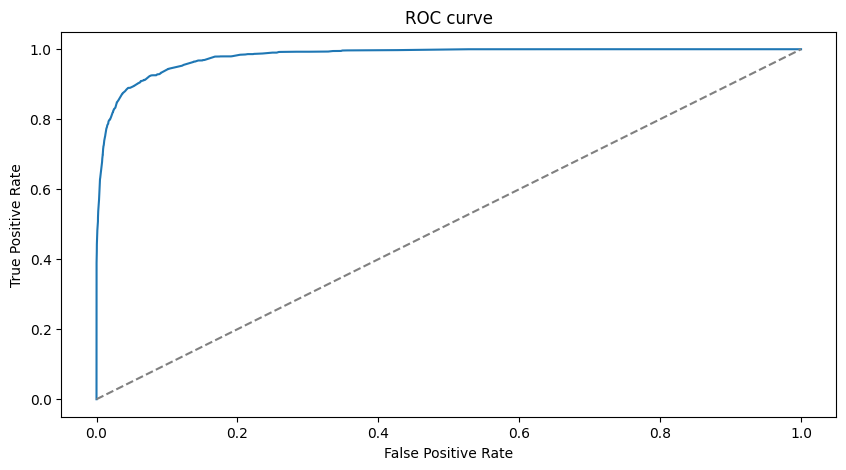

Prediction for all segments...
DONE 

TRAINING FINANCING_SOLD
Splitting train and test datasets...
Training the model...
Evaluating over train dataset...
TRAIN - We have correctly predicted 319155 from a total of 319461. The accuracy is 0.99904.
Confusion matrix:  [[316963     29]
 [   277   2192]]
TN = 316963 - FP = 29 - FN = 277 - TP = 2192
Accuracy:  0.99904
Precision:  0.98694
Recall:  0.88781
Evaluating over test dataset...
Confusion matrix:  [[135828     17]
 [   108    959]]
TN = 135828 - FP = 17 - FN = 108 - TP = 959
Accuracy:  0.99909
Precision:  0.98258
Recall:  0.89878


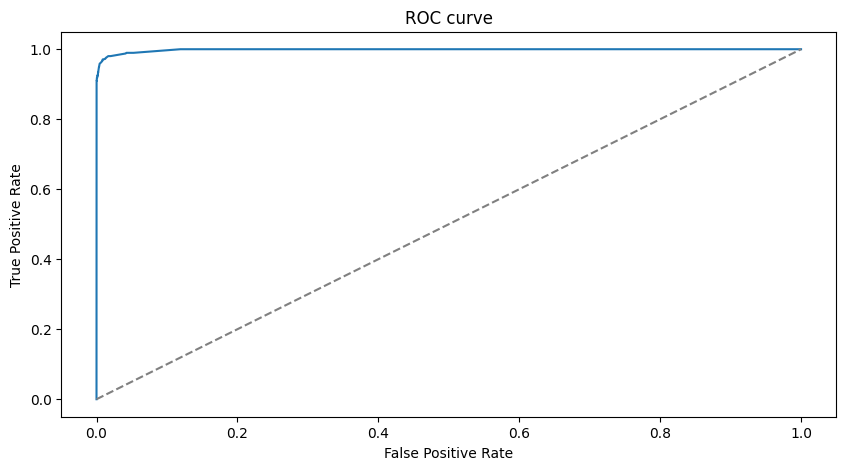

Prediction for all segments...
DONE 

TRAINING INVESMENT_SOLD
Splitting train and test datasets...
Training the model...
Evaluating over train dataset...
TRAIN - We have correctly predicted 313946 from a total of 319461. The accuracy is 0.98274.
Confusion matrix:  [[313386    127]
 [  5388    560]]
TN = 313386 - FP = 127 - FN = 5388 - TP = 560
Accuracy:  0.98274
Precision:  0.81514
Recall:  0.09415
Evaluating over test dataset...
Confusion matrix:  [[134245     52]
 [  2369    246]]
TN = 134245 - FP = 52 - FN = 2369 - TP = 246
Accuracy:  0.98232
Precision:  0.8255
Recall:  0.09407


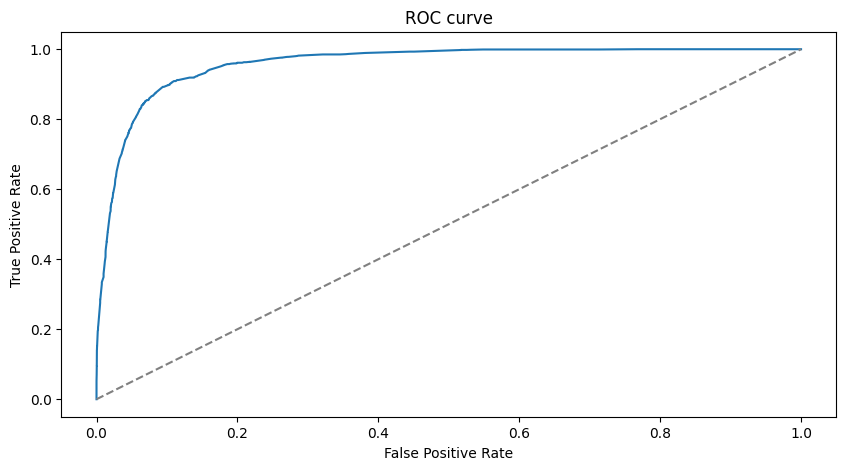

Prediction for all segments...
DONE 

TRAINING ACCOUNT_TYPE_SOLD
Splitting train and test datasets...
Training the model...
Evaluating over train dataset...
TRAIN - We have correctly predicted 259857 from a total of 319461. The accuracy is 0.81342.
Confusion matrix:  [[ 23030  52274]
 [  7330 236827]]
TN = 23030 - FP = 52274 - FN = 7330 - TP = 236827
Accuracy:  0.81342
Precision:  0.81918
Recall:  0.96998
Evaluating over test dataset...
Confusion matrix:  [[  9883  22372]
 [  3183 101474]]
TN = 9883 - FP = 22372 - FN = 3183 - TP = 101474
Accuracy:  0.81335
Precision:  0.81936
Recall:  0.96959


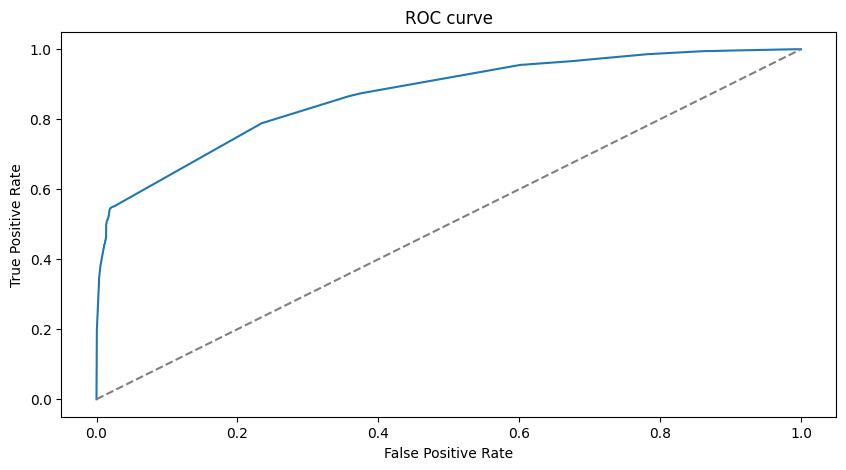

Prediction for all segments...
DONE 



In [72]:
expected_sales , top_features_all = train_models(recommentation_df,segments, prod_sales)

In [73]:
expected_sales

,Low Salary Universitario,High Salary Universitario,Buyer Universitario,Low Salary No Universitario,High Salary No Universitario,Saving Buyer No Universitario,Financing Buyer No Universitario
savings_sold,0.0,0.0,6862.0,6.0,43.0,20652.0,83.0
financing_sold,3.0,1.0,24.0,0.0,0.0,21.0,3148.0
invesment_sold,0.0,0.0,19.0,0.0,0.0,966.0,0.0
account_type_sold,145546.0,54661.0,7176.0,140783.0,36953.0,24670.0,3158.0


Above one can see the estimation of saves for eac hproduct type and segment group.

Below there are the plots that shown the importance of each feature on each model, Saving Products, Financing Products, Investment Products and Account type Products.

**SAVING PRODUCTS**

<Axes: >

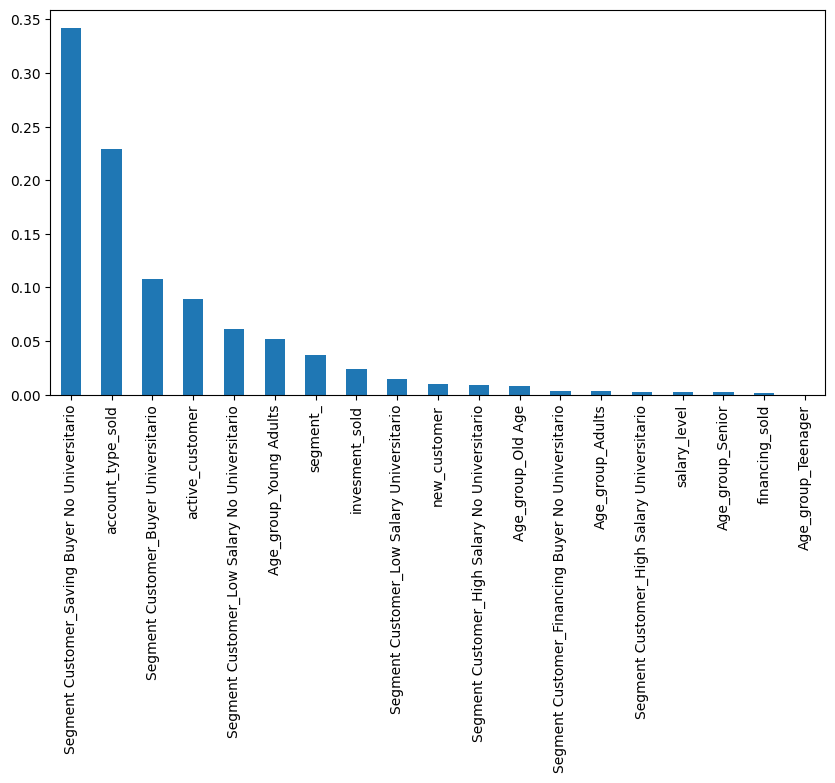

In [74]:
plt.figure(figsize=(10,5))
top_features_all[0].plot(kind="bar")

**FINANCING PRODUCTS**

<Axes: >

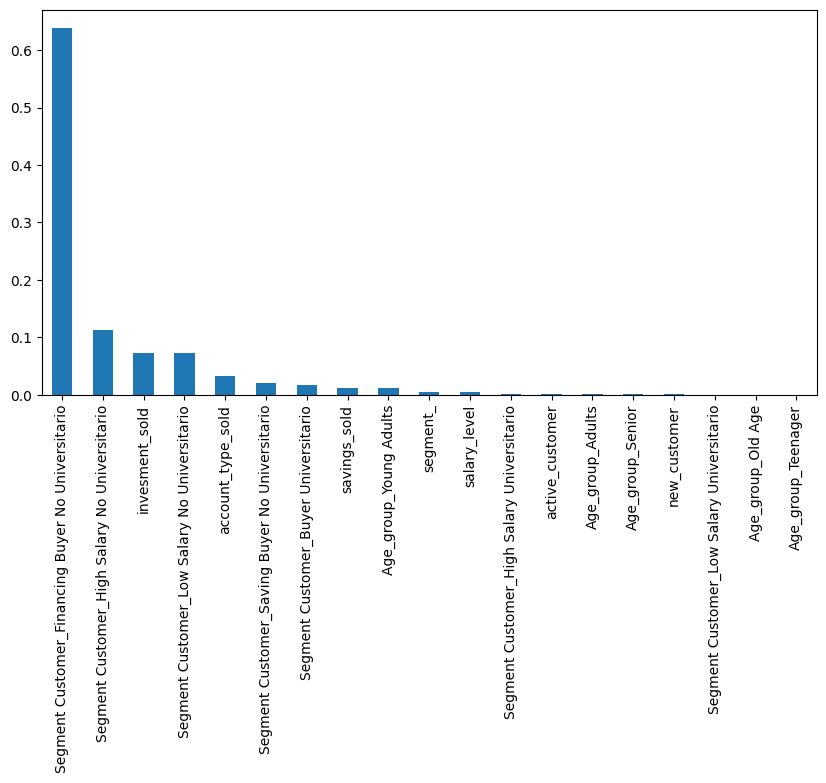

In [75]:
plt.figure(figsize=(10,5))
top_features_all[1].plot(kind="bar")

**INVESTMENT PRODUCTS**

<Axes: >

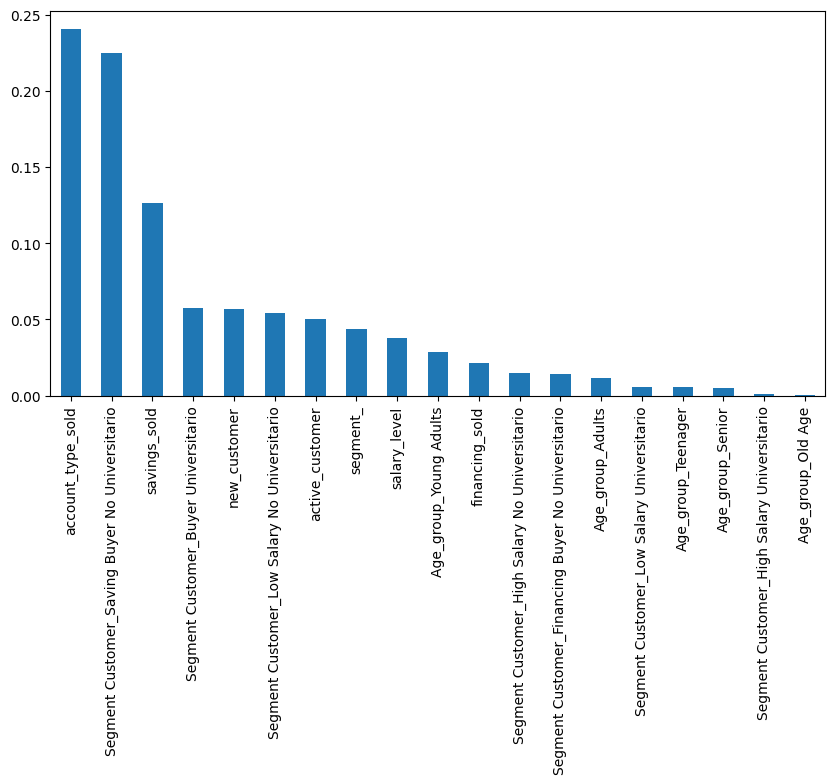

In [76]:
plt.figure(figsize=(10,5))
top_features_all[2].plot(kind="bar")

**ACCOUNT TYPE PRODUCTS**

<Axes: >

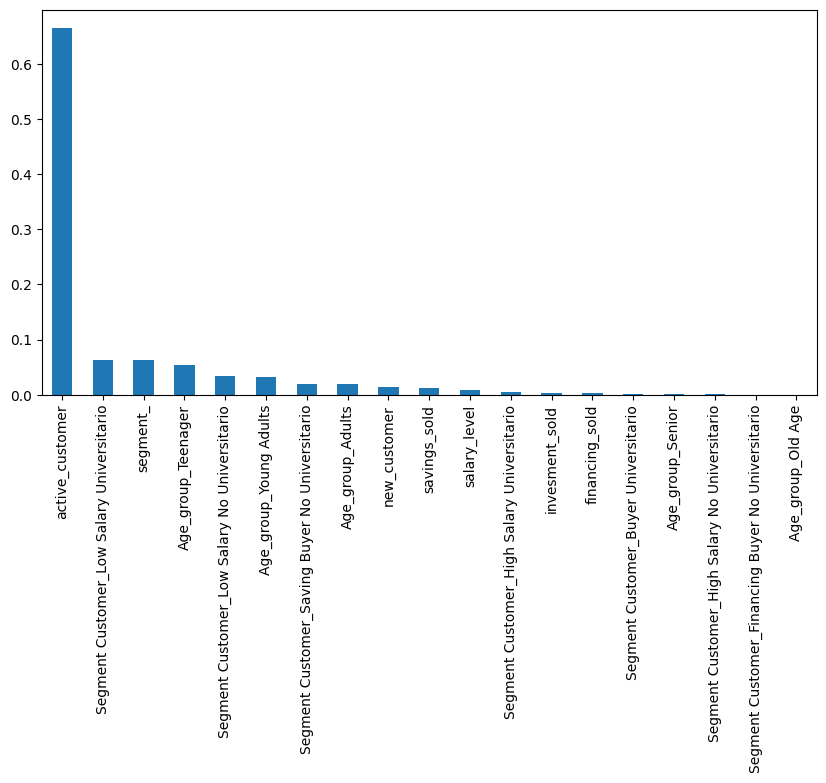

In [77]:
plt.figure(figsize=(10,5))
top_features_all[3].plot(kind="bar")

In [38]:
prod_sales_=prod_sales
prod_sales_.append("Segment total")
segments_=segments
segments_.append("Product total")

### 1.2 Printing expected revenues

Let's then to join all the information, compiling the sales expectation with the revenues to calculate the expected revenues.

In [39]:
expected_revenues=pd.DataFrame(index=prod_sales_, columns=segments_)
for prd_ in segments_:
    if prd_ != "Product total":
        expected_revenues.at["savings_sold",prd_] = revenues.at["Savings","Revenue"] * expected_sales.at["savings_sold",prd_]
        expected_revenues.at["financing_sold",prd_] = revenues.at["Financing","Revenue"] * expected_sales.at["financing_sold",prd_]
        expected_revenues.at["invesment_sold",prd_] = revenues.at["Investment","Revenue"] * expected_sales.at["invesment_sold",prd_]
        expected_revenues.at["account_type_sold",prd_] = revenues.at["Account Type","Revenue"] * expected_sales.at["account_type_sold",prd_]
        expected_revenues.at["Segment total",prd_] = expected_revenues[prd_].sum()

expected_revenues["Product total"] = expected_revenues[segments].sum(axis=1)
expected_revenues

,Low Salary Universitario,High Salary Universitario,Buyer Universitario,Low Salary No Universitario,High Salary No Universitario,Saving Buyer No Universitario,Financing Buyer No Universitario,Product total
savings_sold,0.0,0.0,274480.0,240.0,1720.0,826080.0,3320.0,1105840.0
financing_sold,180.0,60.0,1440.0,0.0,0.0,1260.0,188880.0,191820.0
invesment_sold,0.0,0.0,760.0,0.0,0.0,38640.0,0.0,39400.0
account_type_sold,1455460.0,546610.0,71760.0,1407830.0,369530.0,246700.0,31580.0,4129470.0
Segment total,1455640.0,546670.0,348440.0,1408070.0,371250.0,1112680.0,223780.0,5466530.0


In [40]:
n_total=len(recommentation_sales_df[["pk_cid"]].groupby("pk_cid"))
n_low_uni=len(recommentation_sales_df[recommentation_sales_df["Segment Customer"]=="Low Salary Universitario"][["pk_cid"]].groupby("pk_cid"))
n_hig_uni=len(recommentation_sales_df[recommentation_sales_df["Segment Customer"]=="High Salary Universitario"][["pk_cid"]].groupby("pk_cid"))
n_buy_uni=len(recommentation_sales_df[recommentation_sales_df["Segment Customer"]=="Buyer Universitario"][["pk_cid"]].groupby("pk_cid"))
n_low_nuni=len(recommentation_sales_df[recommentation_sales_df["Segment Customer"]=="Low Salary No Universitario"][["pk_cid"]].groupby("pk_cid"))
n_hig_nuni=len(recommentation_sales_df[recommentation_sales_df["Segment Customer"]=="High Salary No Universitario"][["pk_cid"]].groupby("pk_cid"))
n_sav_nuni=len(recommentation_sales_df[recommentation_sales_df["Segment Customer"]=="Saving Buyer No Universitario"][["pk_cid"]].groupby("pk_cid"))
n_fin_nuni=len(recommentation_sales_df[recommentation_sales_df["Segment Customer"]=="Financing Buyer No Universitario"][["pk_cid"]].groupby("pk_cid"))
print(n_low_uni+n_hig_uni+n_buy_uni+n_low_nuni+n_hig_nuni+n_sav_nuni+n_fin_nuni)

456373


### 1.3 Printing expected response rate

In [78]:
segments=["Low Salary Universitario", "High Salary Universitario", "Buyer Universitario",
                      "Low Salary No Universitario", "High Salary No Universitario", "Saving Buyer No Universitario", "Financing Buyer No Universitario"]
prod_sales=['savings_sold', 'financing_sold', 'invesment_sold', 'account_type_sold']
expected_response_rate=pd.DataFrame(index=prod_sales_, columns=segments)
for prd_ in prod_sales:
        expected_response_rate.at[prd_,"Low Salary Universitario"] = expected_sales.at[prd_,"Low Salary Universitario"] / n_low_uni
        expected_response_rate.at[prd_,"High Salary Universitario"] = expected_sales.at[prd_,"High Salary Universitario"] / n_hig_uni
        expected_response_rate.at[prd_,"Buyer Universitario"] = expected_sales.at[prd_,"Buyer Universitario"] / n_buy_uni
        expected_response_rate.at[prd_,"Low Salary No Universitario"] = expected_sales.at[prd_,"Low Salary No Universitario"] / n_low_nuni
        expected_response_rate.at[prd_,"High Salary No Universitario"] = expected_sales.at[prd_,"High Salary No Universitario"] / n_hig_nuni
        expected_response_rate.at[prd_,"Saving Buyer No Universitario"] = expected_sales.at[prd_,"Saving Buyer No Universitario"] / n_sav_nuni
        expected_response_rate.at[prd_,"Financing Buyer No Universitario"] = expected_sales.at[prd_,"Financing Buyer No Universitario"] / n_fin_nuni

expected_response_rate

,Low Salary Universitario,High Salary Universitario,Buyer Universitario,Low Salary No Universitario,High Salary No Universitario,Saving Buyer No Universitario,Financing Buyer No Universitario
savings_sold,0.0,0.0,0.956243,0.000033,0.001101,0.83696,0.026282
financing_sold,0.000021,0.000018,0.003344,0.0,0.0,0.000851,0.996833
invesment_sold,0.0,0.0,0.002648,0.0,0.0,0.039149,0.0
account_type_sold,1.0,1.0,1.0,0.773061,0.946397,0.999797,1.0
Segment total,NaN,NaN,NaN,NaN,NaN,NaN,NaN


According our model, one can say that practically all the segments have a 100% positive response for all customers. The only exception is the *Low Salary No Universitario* Segment.
Regarding the remaining products, *Low* and *High Salary Universitario* segments won't have a positive response, as well as the *Low* and *High Salary No Universitario* segments.
Also 96% of *Buyer Universitario* and 84% of *Saving Buyer No Universitario* are expected to have a positive response to saving products. The high rate for financing products is also in that last segment.
The *Financing Buyer No Universitario* are expected to have almost 100% of positive response.

### 1.3 Linear Programming to choose the recommendation customers based on revenue maximization

In [84]:
from scipy.optimize import linprog

In [87]:
obj = [-(expected_response_rate.loc["savings_sold","Low Salary Universitario"]*revenues.loc["Savings","Revenue"]+expected_response_rate.loc["financing_sold","Low Salary Universitario"]*revenues.loc["Financing","Revenue"]+
                                   expected_response_rate.loc["invesment_sold","Low Salary Universitario"]*revenues.loc["Investment","Revenue"]+expected_response_rate.loc["account_type_sold","Low Salary Universitario"]*revenues.loc["Account Type","Revenue"]), 
       -(expected_response_rate.loc["savings_sold","High Salary Universitario"]*revenues.loc["Savings","Revenue"]+expected_response_rate.loc["financing_sold","High Salary Universitario"]*revenues.loc["Financing","Revenue"]+
                                   expected_response_rate.loc["invesment_sold","High Salary Universitario"]*revenues.loc["Investment","Revenue"]+expected_response_rate.loc["account_type_sold","High Salary Universitario"]*revenues.loc["Account Type","Revenue"]), 
       -(expected_response_rate.loc["savings_sold","Buyer Universitario"]*revenues.loc["Savings","Revenue"]+expected_response_rate.loc["financing_sold","Buyer Universitario"]*revenues.loc["Financing","Revenue"]+
                                   expected_response_rate.loc["invesment_sold","Buyer Universitario"]*revenues.loc["Investment","Revenue"]+expected_response_rate.loc["account_type_sold","Buyer Universitario"]*revenues.loc["Account Type","Revenue"]), 
       -(expected_response_rate.loc["savings_sold","Low Salary No Universitario"]*revenues.loc["Savings","Revenue"]+expected_response_rate.loc["financing_sold","Low Salary No Universitario"]*revenues.loc["Financing","Revenue"]+
                                   expected_response_rate.loc["invesment_sold","Low Salary No Universitario"]*revenues.loc["Investment","Revenue"]+expected_response_rate.loc["account_type_sold","Low Salary No Universitario"]*revenues.loc["Account Type","Revenue"]), 
       -(expected_response_rate.loc["savings_sold","High Salary No Universitario"]*revenues.loc["Savings","Revenue"]+expected_response_rate.loc["financing_sold","High Salary No Universitario"]*revenues.loc["Financing","Revenue"]+
                                   expected_response_rate.loc["invesment_sold","High Salary No Universitario"]*revenues.loc["Investment","Revenue"]+expected_response_rate.loc["account_type_sold","High Salary No Universitario"]*revenues.loc["Account Type","Revenue"]), 
       -(expected_response_rate.loc["savings_sold","Saving Buyer No Universitario"]*revenues.loc["Savings","Revenue"]+expected_response_rate.loc["financing_sold","Saving Buyer No Universitario"]*revenues.loc["Financing","Revenue"]+
                                   expected_response_rate.loc["invesment_sold","Saving Buyer No Universitario"]*revenues.loc["Investment","Revenue"]+expected_response_rate.loc["account_type_sold","Financing Buyer No Universitario"]*revenues.loc["Account Type","Revenue"]),  
       -(expected_response_rate.loc["savings_sold","Financing Buyer No Universitario"]*revenues.loc["Savings","Revenue"]+expected_response_rate.loc["financing_sold","Financing Buyer No Universitario"]*revenues.loc["Financing","Revenue"]+
                                   expected_response_rate.loc["invesment_sold","Financing Buyer No Universitario"]*revenues.loc["Investment","Revenue"]+expected_response_rate.loc["account_type_sold","Financing Buyer No Universitario"]*revenues.loc["Account Type","Revenue"])]

lhs_eq = [[ 1, 1, 1, 1, 1, 1, 1],  # 1st equation lft side
            ] 

rhs_eq = [[10000]
            ] 

bnd = [(0, n_low_uni), 
       (0, n_hig_uni),
       (0, n_buy_uni),
       (0, n_low_nuni),
       (0, n_hig_uni),
       (0, n_sav_nuni),
       (0, n_fin_nuni)
       ]  

In [86]:
opt = linprog(c=obj, A_eq=lhs_eq, b_eq=rhs_eq,
               bounds=bnd, method="revised simplex")
opt

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -556002.1962095875
       x: [ 0.000e+00  0.000e+00  6.842e+03  0.000e+00  0.000e+00
            0.000e+00  3.158e+03]
     nit: 3

According to the results, we should choose the 3158 *Financing Buyer No Universitario* customers and the remaining 6842 to *Buyer Universitario*, to send the emails. 
To choose the *Buyer Universitario*, we should rank and prioritize the customers that tend to buys more saving products, as shown below:

In [91]:
recommentation_sales_df[recommentation_sales_df["Segment Customer"]=="Buyer Universitario"][["pk_cid","savings_sold","financing_sold","account_type_sold","invesment_sold"]].groupby("pk_cid").sum().sort_values(by="savings_sold",ascending=False)

,savings_sold,financing_sold,account_type_sold,invesment_sold
pk_cid,,,,
1014463,7,0,17,1
1018802,6,0,8,0
1116714,6,0,9,0
1044960,6,0,7,0
1173010,6,0,8,0
...,...,...,...,...
1016901,0,0,10,1
1131507,0,0,7,0
1097624,0,0,3,3


__________________
# C. CONCLUSIONS
__________________

According to our model, and to maximize the potencial revenue, we can conclude that we should sent 3158 email to *Financing Buyer No Universitario* customers and the remaining 6842 to *Buyer Universitario*.